In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

from utils import get_dfs, concat_output_filename, load_head_items
from prep_organized_boycotts import (
    group_by_age, group_by_gender, group_by_genre,
    group_by_occupation, group_by_power, group_by_state, group_by_genre_strict
)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.set_color_codes("dark")
dfs = get_dfs('bcrossing')
users_df = dfs['users']
ratings_df = dfs['ratings']
print(users_df.head())
print(ratings_df.head())

Path to ratings file is: /home/ec2-user/.surprise_data/bcrossing/bcrossing/ratings.csv
       user_id   age country  state
48815    11676   NaN     n/a      4
81153    16877  37.0     usa      0
92472    20806   NaN     usa      0
95333    21356  56.0     usa      0
98536    22625  54.0     usa      0
       user_id  movie_id  rating
48815    11676      9295     5.0
81153    16877      9295     4.5
92472    20806      9295     3.0
95333    21356      9295     3.5
98536    22625      9295     5.0


In [2]:
print(
    len(set(ratings_df.movie_id))
)

13768


Mean
rating    3.887314
dtype: float64
Mean Along Users
3.820788323574527
13768


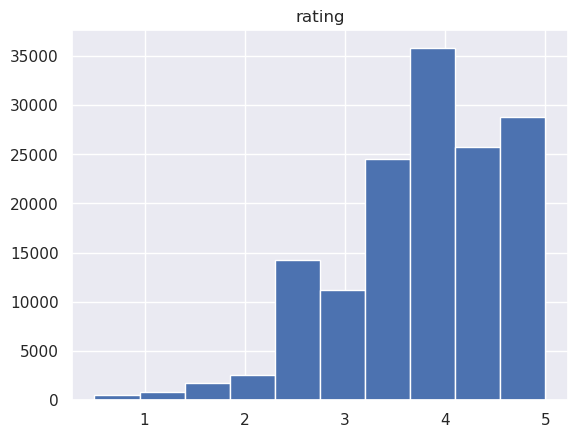

In [3]:
import matplotlib.pyplot as plt
ratings_df[['rating']].hist()
print('Mean')
print(ratings_df[['rating']].mean())
print('Mean Along Users')
user_to_mean = ratings_df.groupby(['user_id']).mean()[['rating']]
print(np.mean(user_to_mean.rating))

print(len(ratings_df.groupby(['movie_id'])))

plt.show()

In [4]:
print(ratings_df[['rating']].count().mean())
print('Counts')
count_ratings = ratings_df.groupby(['movie_id']).count().rating.mean()
count_hits = ratings_df[ratings_df.rating>=4].groupby(['user_id']).count().rating.mean()
print(count_ratings, count_hits)
print(count_ratings/5, count_hits/5)

145888.0
Counts
10.596165020337013 8.127730337078651
2.119233004067403 1.6255460674157303


In [5]:
total_hits = len(ratings_df[ratings_df.rating>=8])
print(total_hits, total_hits/5)

0 0.0


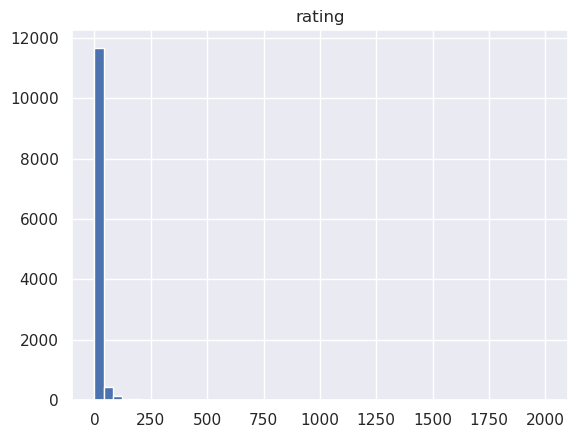

In [6]:
ratings_df[['user_id', 'rating']].groupby(['user_id']).count().hist(bins=np.linspace(0, 2000.0, 50))
plt.show()

In [7]:
tmp = ratings_df[['user_id', 'rating']].groupby(['user_id']).count()
tmp2 = tmp[(tmp.rating >= 20) & (tmp.rating < 500)]
tmp3 = tmp[(tmp.rating >= 1000) & (tmp.rating < 2000)]
print(sum(tmp2.rating))
print(sum(tmp3.rating))

75461
0


In [8]:
count = len(ratings_df[ratings_df.rating >=4])
print(count)
counts = []
for name, group in ratings_df.groupby(['user_id']):
    count = len(group[group.rating >= 4].index) / len(group.index)
    #print(count)
    counts.append(count)
print(np.mean(counts))

90421
0.5883477434271839


In [9]:
uids = list(set(ratings_df.user_id))
uids_to_drop = np.random.choice(uids, int(len(uids) * 7/10))

mask = ratings_df.user_id.isin(uids_to_drop)
post_drop = ratings_df[~mask]
dropped = ratings_df[mask]

print('Mean')
print(np.mean(post_drop.rating))

movie_to_mean = post_drop.groupby(['movie_id']).mean()[['rating']]
#print(movie_to_mean)
print('Mean Along Movies')
print(np.mean(movie_to_mean.rating))

user_to_mean = post_drop.groupby(['movie_id']).mean()[['rating']]
print('Mean Along Users')
print(np.mean(user_to_mean.rating))

# for i, ratingrow in dropped.iterrows():
        
#     #dropped.hist()
#     #print(dropped.mean())
#     vals.append(post_drop.mean())
#dropped.hist()
plt.show()

Mean
3.891108265555962
Mean Along Movies
3.859347053195538
Mean Along Users
3.859347053195538


Text(0, 0.5, 'Number of ratings')

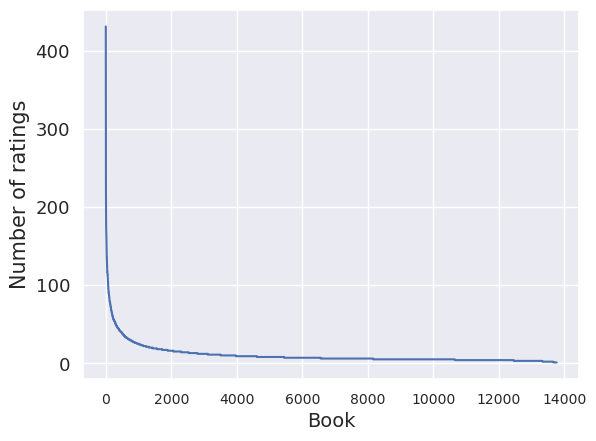

In [15]:
# get item distribution

books_df = ratings_df['movie_id'].value_counts()
# plot item distribution
plt.figure()
plt.plot(books_df.values)
plt.xlabel('Book', fontsize='14')
plt.xticks(fontsize='10')
plt.yticks(fontsize='13')
plt.ylabel('Number of ratings', fontsize='15')

Text(0, 0.5, 'Number of ratings')

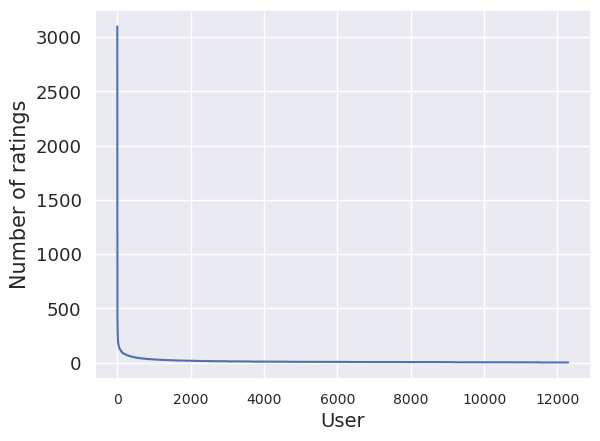

In [14]:
# get users distribution

uusers_df = ratings_df['user_id'].value_counts()
# plot item distribution
plt.figure()
plt.plot(uusers_df.values)
plt.xlabel('User', fontsize='14')
plt.xticks(fontsize='10')
plt.yticks(fontsize='13')
plt.ylabel('Number of ratings', fontsize='15')